# Project One: House Prices

Oliver James
DS 5033 Data Mining & Machine Learning

During the course of this project, you will learn to load, process, visualize and predict with housing data.
We will work through a series of steps:
1. Understand the Overarching Task
2. Acquire and Load the Data
3. Prepare the Data (for ML)
4. Selecting and Training an ML Model
5. Presenting an Analysis on the Solution

We will consolidate this notebook into three following steps:

* Broadly speaking, tasks 1-3 fall under Exploratory Data Analysis (EDA).
* Then, task four encompulates several steps for price price prediction (the modeling side of things).
* Finally, we have our analysis in task five.


Due to some difficulties in acquiring a dataset on Texas and San Antonio housing, we will be relying on an
older dataset. For the purposes of learning, the data is still relevant.

For this project, the data is on Californian houses (when they were still affordable).  
The csv is also attached to the assignment.

* The dataset is available from: https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
* You can also get the csv from: https://github.com/ageron/data/blob/main/housing/housing.csv
* Read more here: https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

In [1]:
#install any libraries you may need
import pandas as pd # for dataframe creation
from pandas.plotting import scatter_matrix #to create scatter matrix for initial EDA
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler #This will be used to scale data t
from sklearn.compose import ColumnTransformer #To allow the application of different transformations (e.g., scaling, encoding) to different columns of your dataset in one unified step.
from sklearn.pipeline import Pipeline #To combine preprocessing and modeling steps into one object, making your code cleaner and reducing the chances of data leakage by ensuring preprocessing is applied consistently.
from sklearn.model_selection import train_test_split #to allow me to split data into training and testing data after standadizing data fields from CSV file for ML models
import matplotlib.pyplot as plt #for plotting
from sklearn.linear_model import LinearRegression #for linear regression


### Exploratory Data Analysis (40%)

The task here is to construct a big picture view of the data set.

1. Download and load the dataset using pandas
2. Print statistics - use the head, info, describe functions
3. Visualize the data using the scatter_matrix function 
4. Visualize the data according to geospatial data (HINT: plot using coordinate data)
5. Improve your geospatial plot: change parameters alpha, s, c, cmap. (your end result should have a colorbar with price and datapoints showing housing density with the hues indicating the price)

In [2]:
#EDA
# Step 1: Load the dataset
df = pd.read_csv('housing.csv')  # read CSV file

# Step 2: Print statistics
print("First 5 rows of the data:")
print(df.head())  # get initial look at data

#Please see next code block for step 3, it is a rather large graph, so I've given it it's own code block


First 5 rows of the data:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  


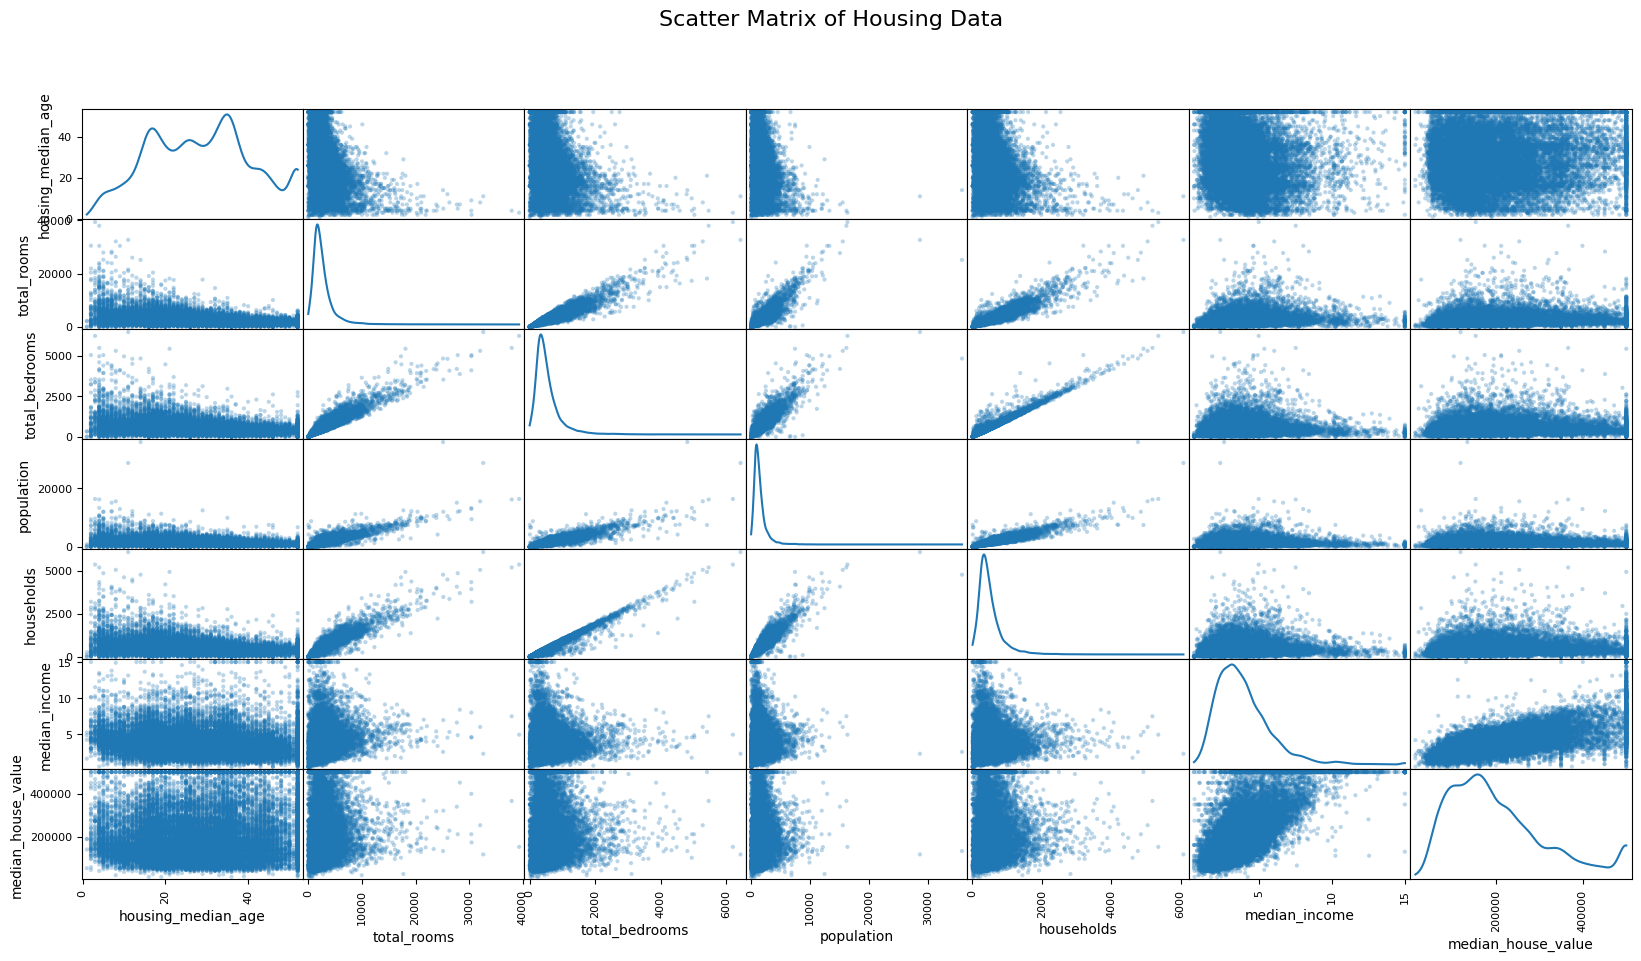

In [3]:
#EDA Continued
#Step 3
# Only include relevant numeric columns to avoid clutter
scatter_matrix(df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
                   'households', 'median_income', 'median_house_value']], 
               figsize=(20, 10), alpha=0.3, diagonal='kde')
plt.suptitle("Scatter Matrix of Housing Data", size=16)
plt.show()


 

In [4]:
#EDA Continued, find some summary statistics
df_1 = pd.read_csv('housing.csv')
df_1['median_income'] = df_1['median_income'] *10000

# Select specific columns
fields_to_analyze = ['housing_median_age', 'median_income', 'median_house_value']
# Generate summary statistics
summary_stats = df_1[fields_to_analyze].describe()
print(summary_stats)

       housing_median_age  median_income  median_house_value
count        20640.000000   20640.000000        20640.000000
mean            28.639486   38706.710029       206855.816909
std             12.585558   18998.217179       115395.615874
min              1.000000    4999.000000        14999.000000
25%             18.000000   25634.000000       119600.000000
50%             29.000000   35348.000000       179700.000000
75%             37.000000   47432.500000       264725.000000
max             52.000000  150001.000000       500001.000000


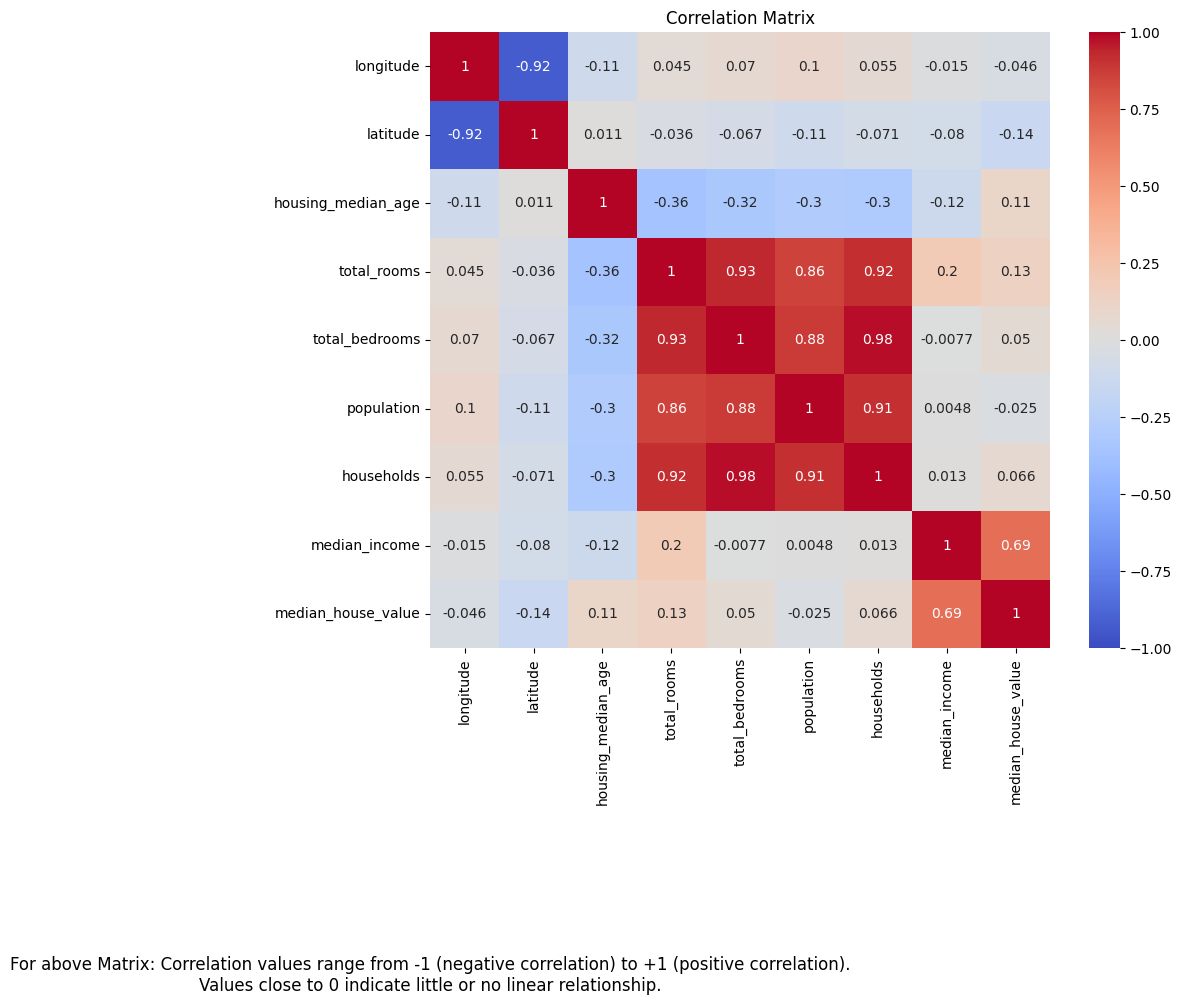

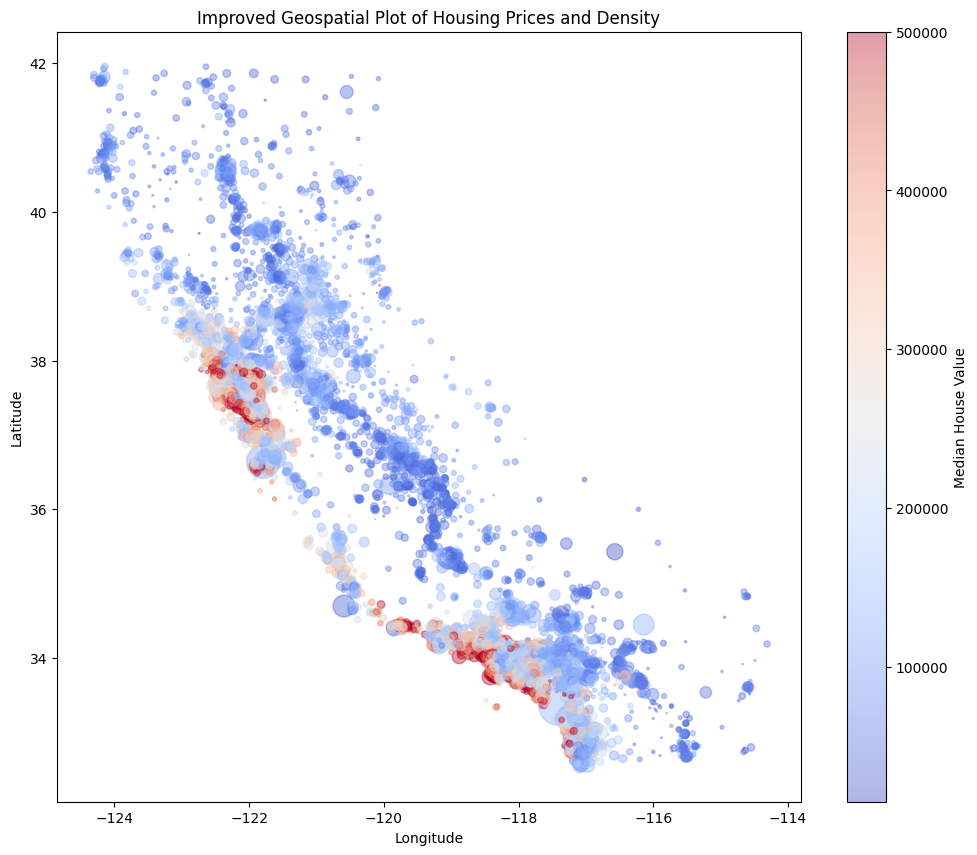

In [5]:
#EDA Continued
# Steps 4 and 5 are here for EDA
# Select only the numeric columns from your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.text(0, -0.5, "For above Matrix: Correlation values range from -1 (negative correlation) to +1 (positive correlation).\nValues close to 0 indicate little or no linear relationship.",
         ha='center', va='top', fontsize=12, transform=plt.gca().transAxes)
plt.show()

# Step 4 & 5 combined: Improved Geospatial Plot with adjustments to alpha, s, c, and cmap
plt.figure(figsize=(12, 10))
plt.scatter(df['longitude'], df['latitude'], 
            c=df['median_house_value'],  # Color represents median house value
            cmap='coolwarm',             # Color map for better contrast
            s=df['population'] / 50,     # Adjust size to represent population
            alpha=0.4)                   # Transparency for overlapping points
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Improved Geospatial Plot of Housing Prices and Density')
plt.show()

### Data Prep and Cleaning (20%)

Here, you will work to further investigate your features.

1. Check your features, are they in the correct units (median_income)
2. Find and fix missing values
3. Handle categorical data (HINT: OneHotEncoder)
4. Check the scaling for data. Does it need adjustment? (HINT: StandardScaler vs MinMaxScaler)
5. EXTRA CREDIT: how are you fixing (2)? Use SimpleImputer

In [6]:
#Data Prep and Cleaning

#use multiple code blocks to organize your code
#Step 1, fix median income to be in the 10ks... So multiply everything by 10,000

df_1 = pd.read_csv('housing.csv')
df_1['median_income'] = df_1['median_income'] *10000
df_1.drop_duplicates()
df_1.dropna()
df_1.to_csv('housing_updated1.csv', index=False)


#step 2, find and fix missing values

# Check for missing values in each column
missing_values = df_1.isnull().sum()
print("Missing values in each column:")
print(missing_values)
print()


#we see that  there 207 missing values in total bedrooms column
print('207 missing values for total bedrooms field, to deal with this issue I will fill it with the median total bedrooms\n')
df_1['total_bedrooms'] = df_1['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Check if the missing values are filled
missing_values = df_1.isnull().sum()
print("Missing values after filling:")
print(missing_values) #solved the problem

Missing values in each column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

207 missing values for total bedrooms field, to deal with this issue I will fill it with the median total bedrooms

Missing values after filling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [7]:
#Data Prep and cleaning
#Step 3 handle categorical data, OneHotEncoder 

print('Now I am going to take a look at the field Ocean_Promixity, since that is the only field that is categorical\n')

# Get unique values
unique_values = df_1['ocean_proximity'].unique()

# Print the unique values
print(f"Unique values in the column: \n")
print(unique_values)

#now I need to encode these values respecively, and update my CSV file
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df_1['ocean_proximity'], prefix='ocean_proximity')

# Convert encoded columns to integers to ensure they appear as 1 and 0
one_hot_encoded = one_hot_encoded.astype(int)

# Concatenate the original dataframe with the encoded columns
df_updated = pd.concat([df_1, one_hot_encoded], axis=1)

# Drop the original 'ocean_proximity' column
df_updated.drop(columns=['ocean_proximity'], inplace=True)

# Save the updated dataframe back to a CSV file
df_updated.to_csv('housing_updated1.csv', index=False)

print("\nThe one-hot encoding is complete, and the updated CSV file has been saved as 'housing_updated1.csv'.")

Now I am going to take a look at the field Ocean_Promixity, since that is the only field that is categorical

Unique values in the column: 

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']

The one-hot encoding is complete, and the updated CSV file has been saved as 'housing_updated1.csv'.


In [8]:
#Data Prep and Cleaning continued
#Step 4, check scaling of data. 
#I used ChatGPT to look at my updated excel file and look at which fields need adjusting, see below recommendations
#It created scatter plots, and I looked for normal, or near normal distribution for standard and skewed for minMaxScaler
"""""
Key Considerations for Scaling:
StandardScaler: Works well for normally distributed data, scales to zero mean and unit variance. Suitable for variables like Median Income and Median House Value.
MinMaxScaler: Rescales data to a fixed range, typically [0, 1]. Better for preserving data structure in features with skewed distributions like Total Rooms and Population.
Recommendation:
Use StandardScaler for features like Median Income and Median House Value.
Use MinMaxScaler for skewed data like Total Rooms, Total Bedrooms, Population, and Households.
"""

# Define transformations
preprocessing = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), ['housing_median_age', 'median_income']),
        ('minmax', MinMaxScaler(), ['total_rooms', 'total_bedrooms', 'population', 'households','median_house_value'])
    ]
)

# Fit and transform the dataset
scaled_data = preprocessing.fit_transform(df_updated)

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['housing_median_age', 'median_income', 'total_rooms', 'total_bedrooms', 'population', 'households','median_house_value'])
print(scaled_df.head())
print()

print('For the standard scalar values, housing_median_age, positive values show how far above the mean, and vice-versa for negative\n')
print('For minmax scalar values total_rooms, total_bedrooms, population, and households MinMaxScaler rescales these features to a range of [0, 1]')
print('Minmax scalar values represent where the values fall relative to the minimum and maximum values of the feature, values are based on the feature''s range, not its mean.')
print('Thus, a value of 0.019863 is around 0.02 units between the minimum and maximum, not necessarily near the mean.')

   housing_median_age  median_income  total_rooms  total_bedrooms  population  \
0            0.982143       2.344766     0.022331        0.019863    0.008941   
1           -0.607019       2.332238     0.180503        0.171477    0.067210   
2            1.856182       1.782699     0.037260        0.029330    0.013818   
3            1.856182       0.932968     0.032352        0.036313    0.015555   
4            1.856182      -0.012881     0.041330        0.043296    0.015752   

   households  median_house_value  
0    0.020556            0.902266  
1    0.186976            0.708247  
2    0.028943            0.695051  
3    0.035849            0.672783  
4    0.042427            0.674638  

For the standard scalar values, housing_median_age, positive values show how far above the mean, and vice-versa for negative

For minmax scalar values total_rooms, total_bedrooms, population, and households MinMaxScaler rescales these features to a range of [0, 1]
Minmax scalar values represent 

### Price Prediction (20%)

Now you will create and test many ML models. The idea is to play with hyperparameters and model types.
You may find that some of your data prep needs further tweaking.

Now that you understand the big picture and have an intuition on how homes may be priced, you can move on to creating a price model.
Generally, you will want to follow the order of steps below (with 1&2 already completed):

1. Create a copy of your data.
2. On the copy, perform the data prep transformations.
3. Create a train & test split. Generally, 80-20 splits work pretty well.
4. Use a model you understand well. We recently learned how LinearRegression. How well does this model work?
5. In our introductory class, we also learned about the DecisionTreeRegressor. How does this perform?
6. EXTRA CREDIT: Model prices with the RandomForestRegressor model

The main idea here is to get used to programming and modeling on real data. Report your results and aim for
a ballpark Root Mean Squared Error less than 75K.

In [9]:
#Price Prediction

#Step 1, Create a Copy of my data
# Create a copy of the entire DataFrame
df_copy = scaled_df.copy()

# Step 2, on the copy, perform the data prep transformations
#I used the code from above, but on the df_copy dataframe.
preprocessing = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), ['housing_median_age', 'median_income']),
        ('minmax', MinMaxScaler(), ['total_rooms', 'total_bedrooms', 'population', 'households','median_house_value'])
    ]
)

# Fit and transform the dataset
scaled_data = preprocessing.fit_transform(df_copy)

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['housing_median_age', 'median_income', 'total_rooms', 'total_bedrooms', 'population', 'households','median_house_value'])

Train set size: 16512 rows
Test set size: 4128 rows


From the correlation matrix, we see a relationship that appears strongest between median income and the price of the house, indidicating higher incomes buy more expensive homes.
There appears to be a positive relationship between median income and median house value, meaning that higher incomes are generally associated with higher house values.
The data points are more concentrated towards the lower median income values (around 0 to 2 on the x-axis)
Additionally, it appears there is a hard cap at median house value of 1, suggesting a potential max threshold


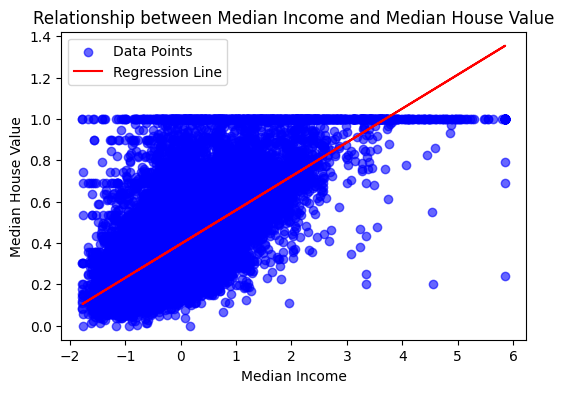

In [10]:
#Price Predicition Continued

#Step 3. Create a train & test split. Generally, 80-20 splits work pretty well.
X = scaled_df.drop('median_income', axis=1)  # Features (excluding target)
y = scaled_df['median_house_value']  # Target

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the sizes of the splits
print(f"Train set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")
print()
print()

print('From the correlation matrix, we see a relationship that appears strongest between median income and the price of the house, indidicating higher incomes buy more expensive homes.')

# Scatter plot for median_income vs. median_house_value
# Fit a linear regression model
model = LinearRegression()
model.fit(scaled_df[['median_income']], scaled_df['median_house_value'])

# Predict values for the line
predicted_values = model.predict(scaled_df[['median_income']])

# Plot with regression line
plt.figure(figsize=(6, 4))
plt.scatter(scaled_df['median_income'], scaled_df['median_house_value'], alpha=0.6, color='blue', label='Data Points')
plt.plot(scaled_df['median_income'], predicted_values, color='red', label='Regression Line')
plt.title('Relationship between Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
print('There appears to be a positive relationship between median income and median house value, meaning that higher incomes are generally associated with higher house values.\nThe data points are more concentrated towards the lower median income values (around 0 to 2 on the x-axis)')
print('Additionally, it appears there is a hard cap at median house value of 1, suggesting a potential max threshold')

### Analysis (20%):

A critical component in science is communicating your results and explaining the reseasoning behind the results.
A good presentation here should include the following:  

1. An introduction to the dataset, any things we should know (e.g. how it was collected, common errors). 
2. What did you discover in your EDA? What do you do with missing values, outliers, etc.  
3. What kind of distribution is the data? Is there a skew or high concentration of houses in a certain range?  
4. What correlations were revealed in the analysis? e.g. footage and price, do they correlate positively?  
5. Feature selection: which feature worked for price predictions and what was noise? How did you determine?

The points above are for guidance; you can choose your template and structure.  
The idea is to present a short report (no word counts) that is structured. 
structured, clear, and concise.  
You can refer back to your figures and use external links to explain your insights.

Analysis
1a.)Intro to the dataset: The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.
1b.) General Things to know: Data was collected from Kaggle free data source, not up-to-date, serves mostly as a practice dataset, it is not current

2a.) Discoveries: Houses were a LOT cheaper in the 1990s then they are today. For example the average home price from the median home value in the data set was 206855.81690. According to Zillow.com, the new median home price is approximately 771k https://www.zillow.com/home-values/9/ca/. Additionally, salaries were much lower in the 1990s than currently. The average value from the median salary was 38706.710029. All these findings seem very low. Further analysis is suggested. However, I went onto google and asked what the median income in CA was in the 1990s. The response was "$33,290 The median income in California in the 1990s reached $33,290 by the end of the decade in 1990".

2b.) Missing Values: 207 missing values from the total bedrooms field. To remedy this issue, I replaced the missing values with 

### use this markdown cell to write a report

[here]

### Submission:

You need to prepare your ipynb/jupyter notebook for grading.
The two main tasks are ensuring all your cell outputs are present and that you convert the notebook to PDF.

The instructs will vary slightly based on the platform (collab, kaggle, anaconda, etc).
Generally, inside the notebook, you will want to:
1. Restart & clear all cell outputs (optional, may detect buggy program control flow)
2. Run all (must do; I need to see your code cell outputs!)

Next, you need to download the notebook as a PDF. Unfortunately, exporting as PDF is a bit tricky.
An easy work around:
1. Download the notebook. (all platforms allow the default .ipynb export)
2. https://onlineconvertfree.com/convert-format/ipynb-to-pdf/

If you are unable to upload as a PDF, submit the .ipynb. Do NOT upload a .py file.

### Rubric:

Please see the associated percentage allocations.  
In general, ensure your code runs correctly.  Make your the PDF upload includes your code ouputs.  
You will be given significant credit for documentation and pseudo-code.

For more details, please read the rubric PDF in the assignment files.